![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

![image](image.png)

image thanks to:https://www.google.com/url?sa=i&url=https%3A%2F%2Ftwitter.com%2Fallison_horst%2Fstatus%2F1270046411002753025&psig=AOvVaw3crXc1laiozNOduQLLQbvf&ust=1711246227729000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNDPqo6niYUDFQAAAAAdAAAAABAi

In [73]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [74]:
penguins_df.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [75]:
penguins_df= penguins_df.drop(3, axis=0)

In [76]:
penguins_df.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [77]:
penguins_df.shape

(343, 5)

In [78]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [79]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.1+ KB


In [80]:
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [81]:
df_num = penguins_df.select_dtypes(include=['number'])
df_clas = penguins_df.select_dtypes(include=['object'])

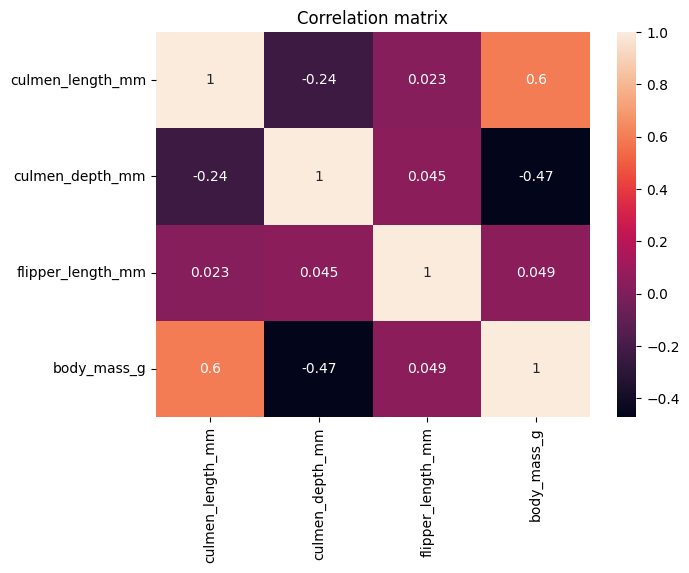

In [82]:
plt.figure(figsize=(7,5))
sns.heatmap(df_num.corr(), annot=True)
plt.title('Correlation matrix')
plt.show()

<Figure size 1000x700 with 0 Axes>

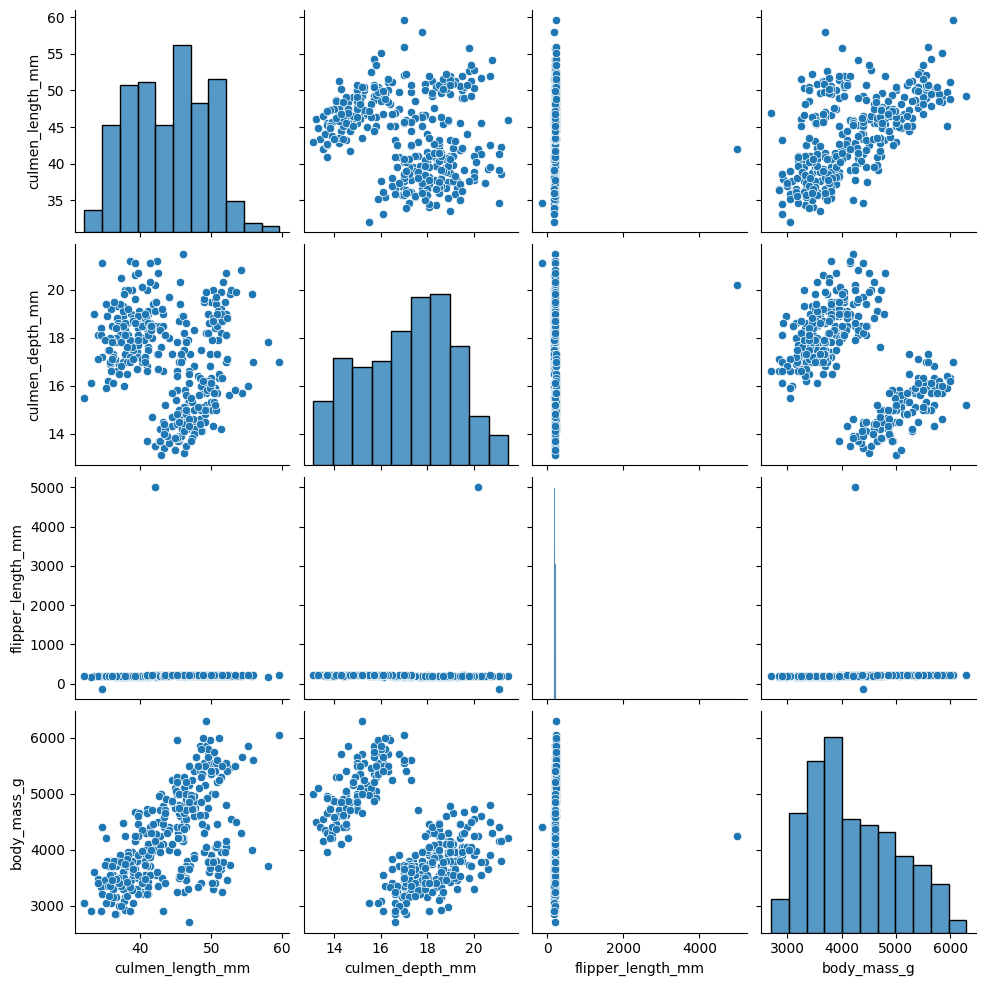

In [83]:
plt.figure(figsize=(10,7))
sns.pairplot(df_num)
plt.show()

Text(0.5, 1.0, 'body mass by sex')

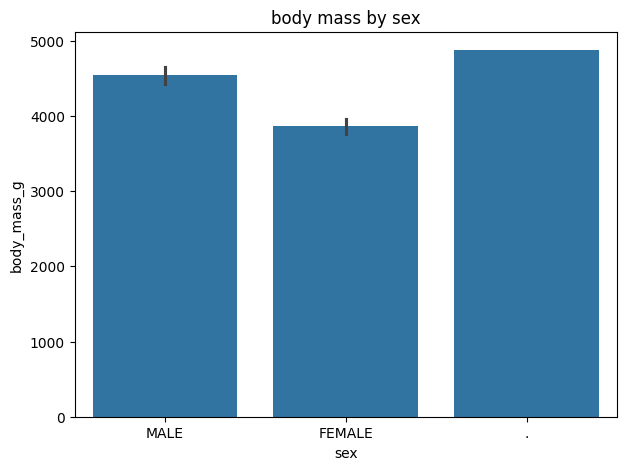

In [84]:
#plotting to explore the data, and we see the first aanomaly
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='body_mass_g', data=penguins_df)
plt.title('body mass by sex')

In [85]:
#the anomaly still
penguins_df.groupby(by='sex')['body_mass_g'].mean()

sex
.         4875.000000
FEMALE    3862.272727
MALE      4543.934911
Name: body_mass_g, dtype: float64

Investigating the presence of three different categories in the 'sex' column, including the occurrence of a non-standard representation as a dot ('.') symbol.

In [86]:
unknow_value = penguins_df[penguins_df['sex']=='.']
unknow_value

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


Upon further examination, we observed that the third type with the dot representation exists in only a single row. As a result, we can confidently proceed to drop this particular row from the dataset.

In [87]:
penguins_df = penguins_df[penguins_df['sex'] != '.']
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


now we can follow the analisys

In [88]:
penguins_df.groupby(by='sex')['body_mass_g'].mean()

sex
FEMALE    3862.272727
MALE      4543.934911
Name: body_mass_g, dtype: float64

Text(0.5, 1.0, 'Body mass by sex')

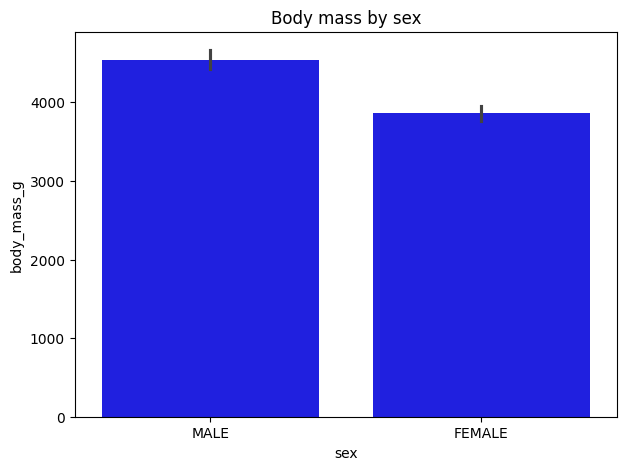

In [89]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='body_mass_g', data=penguins_df, color='Blue')
plt.title('Body mass by sex')

In [90]:
penguins_df.groupby(by='sex')['flipper_length_mm'].mean()

sex
FEMALE    197.363636
MALE      230.928994
Name: flipper_length_mm, dtype: float64

Text(0.5, 1.0, 'Flipper length by sex')

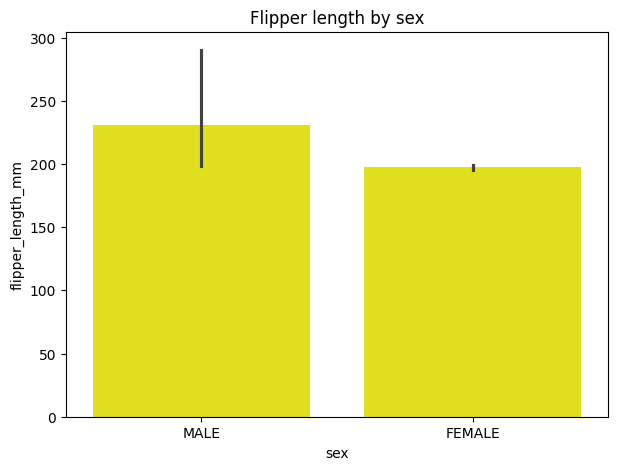

In [91]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='flipper_length_mm', data=penguins_df, color='yellow')
plt.title('Flipper length by sex')

Text(0.5, 1.0, 'Flipper length distribution by sex')

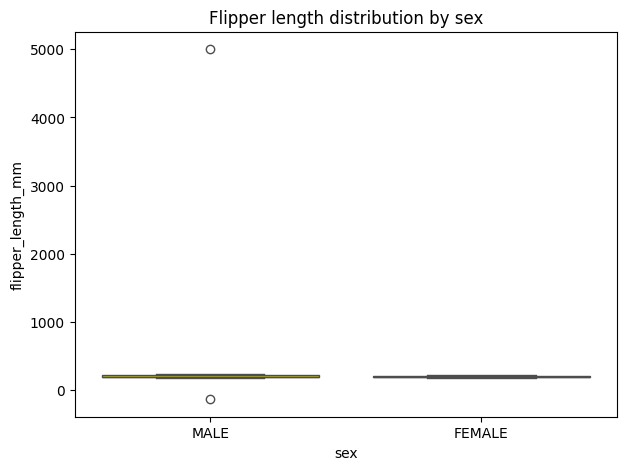

In [92]:
plt.figure(figsize=(7,5))
sns.boxplot(x='sex', y='flipper_length_mm', data=penguins_df, color='yellow')
plt.title('Flipper length distribution by sex')

In [93]:
penguins_df = penguins_df[penguins_df['flipper_length_mm']!= -132]
penguins_df = penguins_df[penguins_df['flipper_length_mm']!= 5000]

In [94]:
penguins_df.groupby(by='sex')['flipper_length_mm'].mean()

sex
FEMALE    197.363636
MALE      204.544910
Name: flipper_length_mm, dtype: float64

Text(0.5, 1.0, 'Flipper length by sex')

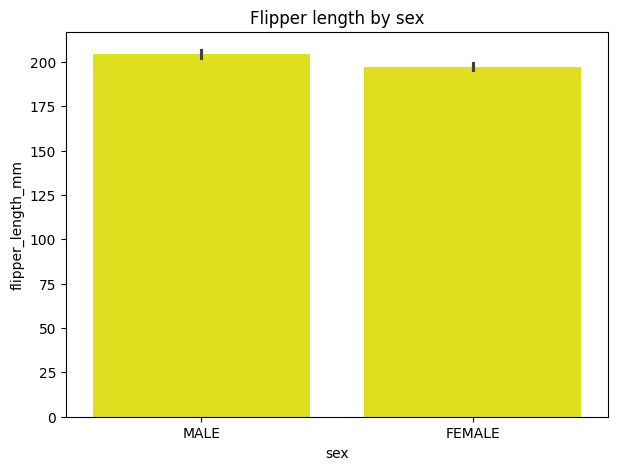

In [95]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='flipper_length_mm', data=penguins_df, color='yellow')
plt.title('Flipper length by sex')

Text(0.5, 1.0, 'Flipper length distribution by sex')

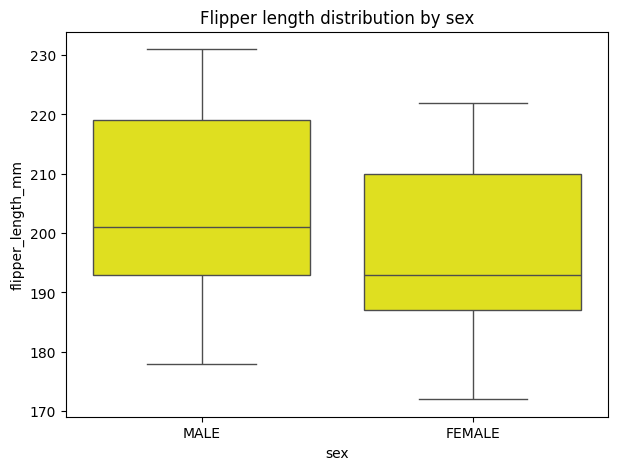

In [96]:
plt.figure(figsize=(7,5))
sns.boxplot(x='sex', y='flipper_length_mm', data=penguins_df, color='yellow')
plt.title('Flipper length distribution by sex')

In [97]:
penguins_df.groupby(by='sex')['culmen_depth_mm'].mean()

sex
FEMALE    16.425455
MALE      17.871856
Name: culmen_depth_mm, dtype: float64

Text(0.5, 1.0, 'Culmen depth by sex')

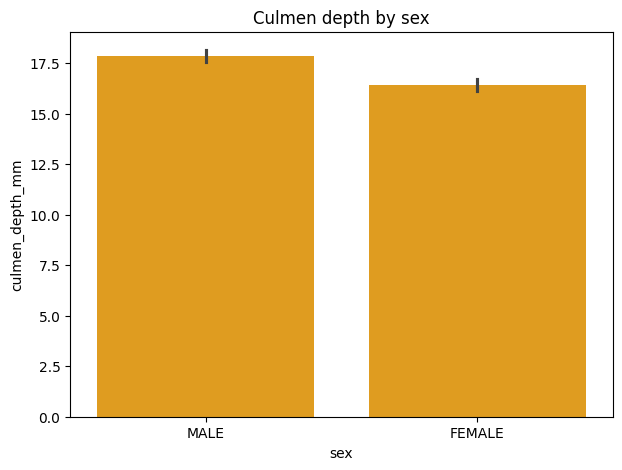

In [98]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='culmen_depth_mm', data=penguins_df, color='Orange')
plt.title('Culmen depth by sex')

In [99]:
penguins_df.groupby(by='sex')['culmen_length_mm'].mean()

sex
FEMALE    42.096970
MALE      45.922156
Name: culmen_length_mm, dtype: float64

Text(0.5, 1.0, 'Culmen length by sex')

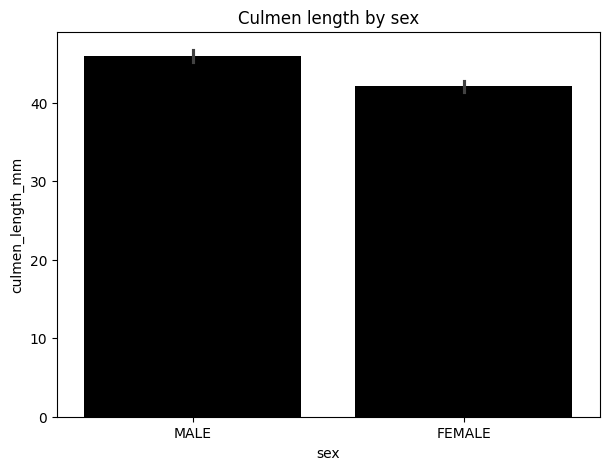

In [100]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='culmen_length_mm', data=penguins_df, color='black')
plt.title('Culmen length by sex')

In [101]:
penguins_df.isnull().sum()

culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  8
dtype: int64

In [102]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df_imput = imputer.fit_transform(penguins_df)

In [103]:
penguins_clean = pd.DataFrame(df_imput, columns = penguins_df.columns)
penguins_clean.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [113]:
penguis_clean =penguins_clean.dropna()

In [119]:
feature_pro = pd.get_dummies(penguins_clean['sex'])
feature_pro

,FEMALE,MALE
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
335,0,1
336,1,0
337,0,1
338,1,0


In [121]:
penguins_pre = pd.concat([penguins_clean, penguins_cleann], axis=1)
penguins_pre = penguins_pre.drop(columns='sex')
penguins_pre

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
335,41.1,17.0,190.0,3800.0,0,1
336,46.8,14.3,215.0,4850.0,1,0
337,50.4,15.7,222.0,5750.0,0,1
338,45.2,14.8,212.0,5200.0,1,0


In [126]:
#Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_pre)

In [127]:
penguins_preprocessed = pd.DataFrame(penguins_preprocessed, columns=penguins_pre.columns)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,-0.889775,0.799804,-1.414253,-0.558082,-0.971008,0.971008
1,-0.816316,0.135680,-1.058493,-0.495777,1.029857,-1.029857
2,-0.669397,0.442199,-0.418123,-1.181125,1.029857,-1.029857
3,-1.330530,1.106323,-0.560428,-0.931908,1.029857,-1.029857
4,-0.853045,1.770447,-0.773884,-0.682690,-0.971008,0.971008
...,...,...,...,...,...,...
335,-0.522479,-0.068666,-0.773884,-0.495777,-0.971008,0.971008
336,0.524315,-1.448001,1.004919,0.812613,1.029857,-1.029857
337,1.185448,-0.732791,1.502984,1.934091,-0.971008,0.971008
338,0.230478,-1.192569,0.791463,1.248743,1.029857,-1.029857


In [128]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(penguins_preprocessed)

PCA()

In [129]:
features = range(pca.n_components_)

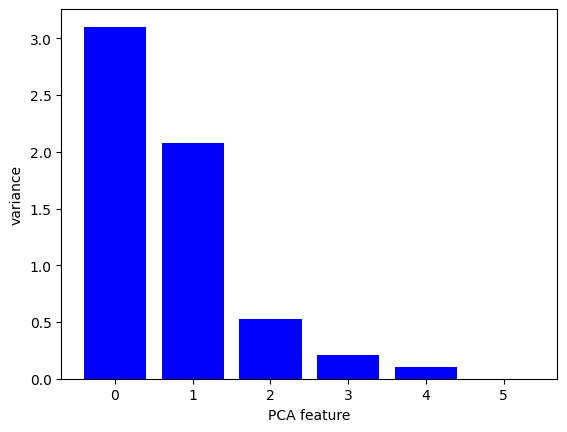

In [130]:
plt.bar(features, pca.explained_variance_, color='blue')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [131]:
pca = PCA(n_components=2, random_state=42)
pca.fit(penguins_preprocessed)

PCA(n_components=2, random_state=42)

In [133]:
penguins_features = pca.transform(penguins_preprocessed)
penguins_features.shape

(340, 2)

In [134]:
from sklearn.cluster import KMeans
inertia = []

ks = range(1,10)

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(penguins_features)
  inertia.append(model.inertia_)
print(inertia)

[1754.766833777313, 924.252420826739, 446.07315489872286, 135.33643664204448, 96.7908543837622, 67.21226969533022, 56.766913212815865, 45.59679951728141, 41.13679373260101]


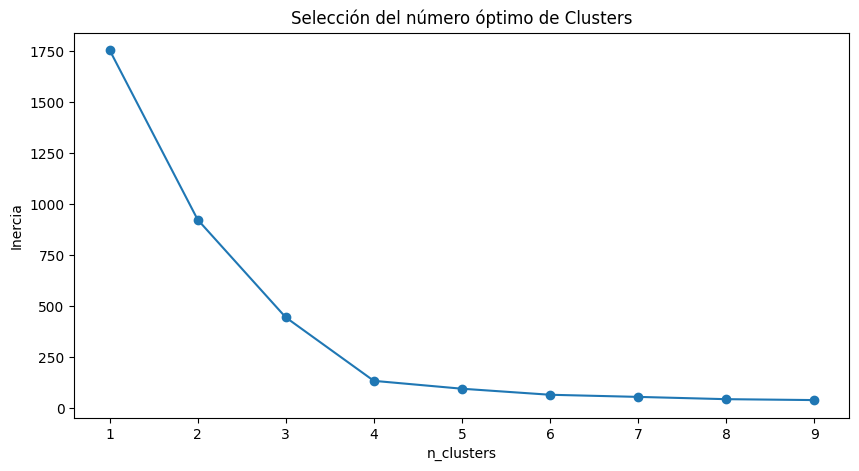

In [135]:
plt.figure(figsize=(10,5))
plt.plot(ks, inertia, '-o')
plt.title('Selección del número óptimo de Clusters')
plt.ylabel('Inercia')
plt.xlabel('n_clusters')
plt.xticks(ks)
plt.show()

In [137]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(penguins_features)

KMeans(n_clusters=4, random_state=42)

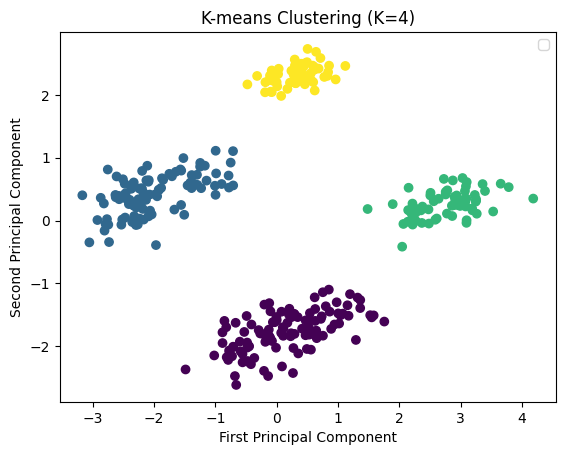

In [140]:
plt.scatter(penguins_features[:,0],penguins_features[:,1], c=model.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={4})')
plt.legend()
plt.show()

In [143]:
penguins_clean['label'] = model.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.598198,19.046847,194.351351
1,40.217757,17.611215,189.046729
2,49.310938,15.645313,221.250000
3,45.563793,14.237931,212.706897
